In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('ushape.csv')
df

,3.159499363321345566e-02,9.869877579082642072e-01,0.000000000000000000e+00
0,2.115098,-0.046244,1.0
1,0.882490,-0.075756,0.0
2,-0.055144,-0.037332,1.0
3,0.829545,-0.539321,1.0
4,2.112857,0.662084,1.0
...,...,...,...
94,1.699453,0.587720,1.0
95,0.218623,-0.652521,1.0
96,0.952914,-0.419766,1.0
97,-1.318500,0.423112,0.0


In [3]:
df.head()

,3.159499363321345566e-02,9.869877579082642072e-01,0.000000000000000000e+00
0,2.115098,-0.046244,1.0
1,0.882490,-0.075756,0.0
2,-0.055144,-0.037332,1.0
3,0.829545,-0.539321,1.0
4,2.112857,0.662084,1.0


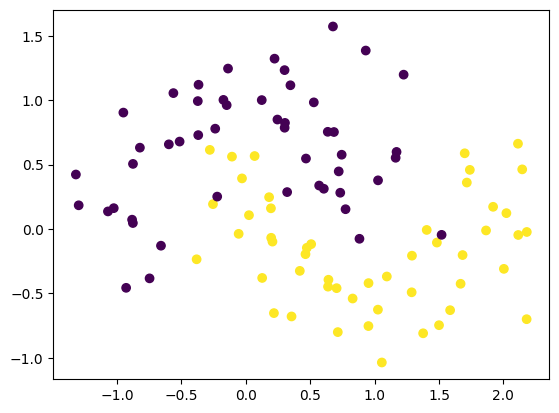

In [4]:
plt.scatter(x=df['3.159499363321345566e-02'],y=df['9.869877579082642072e-01'],c=df['0.000000000000000000e+00'])

In [5]:
x = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [6]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [7]:
model = Sequential()

model.add(Dense(10,activation='sigmoid',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                30        
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 41 (164.00 Byte)
Trainable params: 41 (164.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=2,kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(1,activation='sigmoid'))

In [9]:
model.get_weights()

[array([[-0.37323374, -1.7998923 , -1.5725235 ,  0.29512233,  1.778003  ,
         -1.1648202 , -0.98186445, -1.6865819 , -1.5009401 ,  1.3720245 ],
        [-1.3693972 , -0.68745184,  0.16104746,  0.41749892,  0.44099972,
          0.43589106,  2.1708035 , -0.6332759 ,  0.8595306 , -0.7682419 ]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.29492688, -0.76886433,  0.8175279 , -0.30230737, -0.19235563,
          0.62053144, -0.0820869 ,  0.7249535 ,  0.12505043, -0.1263041 ],
        [-0.14813128,  0.55643135, -0.32233894, -0.809368  ,  0.1912393 ,
          0.5012695 , -0.19280948,  0.48850977, -0.08564065, -0.52087176],
        [ 0.04732812, -0.66460156,  0.8807964 ,  0.7922787 ,  0.5436921 ,
          0.21046372,  0.06494443,  0.09685522, -0.98957247,  0.07035482],
        [ 0.08861163, -0.7635639 , -0.73156166, -0.05309994,  0.46011624,
         -0.12038855, -0.19967793,  0.3399544 ,  0.2703469 , -0.36264542],
        [ 0.98620

In [10]:
initial_weights = model.get_weights()

In [11]:
initial_weights[0] = np.random.randn(2,10)*np.sqrt(1/2)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)
initial_weights[4] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[5] = np.zeros(model.get_weights()[5].shape)
initial_weights[6] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[7] = np.zeros(model.get_weights()[7].shape)
initial_weights[8] = np.random.randn(10,1)*np.sqrt(1/10)
initial_weights[9] = np.zeros(model.get_weights()[9].shape)

In [12]:
model.set_weights(initial_weights)

In [14]:
model.get_weights()

[array([[ 0.96721166, -0.5554265 ,  1.1494371 , -0.5977201 ,  0.9846468 ,
         -0.41491944,  0.92210925,  0.13362826, -0.411834  ,  0.4123664 ],
        [-0.04899804, -0.04782279,  0.52509713, -0.13154367, -0.34100536,
         -0.6649977 ,  0.6361539 , -1.670801  ,  0.32895067,  0.13316903]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.15550809,  0.590026  ,  0.2447158 , -0.1533489 ,  0.02414793,
         -0.19755748,  0.32602072, -0.08420586,  0.03708765, -0.2993974 ],
        [ 0.23347464,  0.1655631 ,  0.08246092, -0.27586758, -0.07450011,
          0.24046965,  0.0344594 , -0.12707205,  0.45603436, -0.0125054 ],
        [-0.24080598,  0.4794121 , -0.25644445, -0.23196794, -0.02517691,
          0.28000826,  0.37216556,  0.09812959, -0.2771533 ,  0.12317622],
        [-0.45460424, -0.2556964 ,  0.4663847 ,  0.14647897, -0.03117296,
          0.03239645, -0.26504558, -0.49232912,  0.27815288,  0.0439599 ],
        [-0.50547

In [15]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [16]:
history = model.fit(x,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 [==============================] - 2s 166ms/step - loss: 0.7340 - accuracy: 0.4937 - val_loss: 0.7286 - val_accuracy: 0.5000
Epoch 2/100
3/3 [==============================] - 0s 20ms/step - loss: 0.7292 - accuracy: 0.4937 - val_loss: 0.7233 - val_accuracy: 0.5000
Epoch 3/100
3/3 [==============================] - 0s 19ms/step - loss: 0.7242 - accuracy: 0.4937 - val_loss: 0.7178 - val_accuracy: 0.5000
Epoch 4/100
3/3 [==============================] - 0s 18ms/step - loss: 0.7199 - accuracy: 0.4937 - val_loss: 0.7124 - val_accuracy: 0.5000
Epoch 5/100
3/3 [==============================] - 0s 19ms/step - loss: 0.7163 - accuracy: 0.4937 - val_loss: 0.7069 - val_accuracy: 0.5000
Epoch 6/100
3/3 [==============================] - 0s 21ms/step - loss: 0.7117 - accuracy: 0.4937 - val_loss: 0.7015 - val_accuracy: 0.5000
Epoch 7/100
3/3 [==============================] - 0s 17ms/step - loss: 0.7075 - accuracy: 0.4937 - val_loss: 0.6960 - val_accuracy: 0.5000
Epoch 8/100
3/3 [==

In [17]:
model.get_weights()

[array([[ 0.9239515 , -0.7523577 ,  1.0766695 , -0.78293765,  1.0573537 ,
         -0.5987312 ,  1.0031571 ,  0.24082792, -0.16090825,  0.3181138 ],
        [-0.09243501,  0.14394361,  0.7115611 ,  0.01493019, -0.6173777 ,
         -0.62458205,  0.62102   , -1.755542  ,  0.634774  ,  0.38209757]],
       dtype=float32),
 array([-0.03550042, -0.01674287,  0.06039802,  0.01837018, -0.23076996,
        -0.05403302,  0.08974405,  0.16321781,  0.05910985,  0.07256154],
       dtype=float32),
 array([[ 0.3039224 ,  0.47425476,  0.21499221, -0.1533489 ,  0.14090973,
         -0.18031019,  0.29551244, -0.1243244 , -0.09372722, -0.2060136 ],
        [ 0.21291873,  0.3089273 ,  0.25935072, -0.27586758, -0.15821682,
          0.12740947, -0.00919252,  0.01280511,  0.6407851 , -0.13902509],
        [-0.15414906,  0.46282446, -0.30601978, -0.23196794,  0.00972324,
          0.26690662,  0.33604038,  0.2158815 , -0.20655791,  0.30849358],
        [-0.4713179 , -0.11943594,  0.6344603 ,  0.14647897, 

9600/9600 [==============================] - 11s 1ms/step


<Axes: >

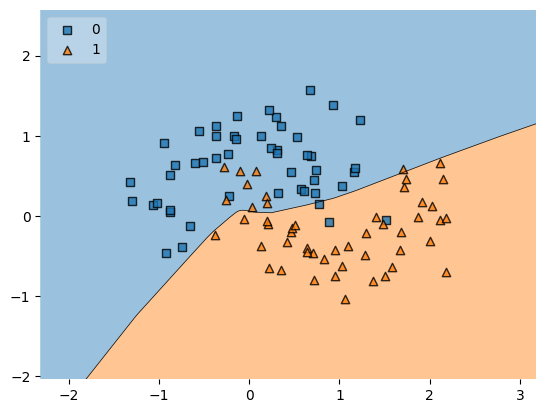

In [18]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x,y.astype('int'), clf=model, legend=2)

In [19]:
(np.random.randn(10,10)*0.01).min()

-0.031081331759979226

In [20]:
(np.random.randn(10,10)*0.01).max()

0.03298767921922862